# Clustering

In this notebook we will study about **K-Means** algorithm but first we will start with **Loading Data**. Before exploring data, let us have a look at the data dictionary

Following is the Data Dictionary for Credit Card dataset :-

**CUST_ID** : Identification of Credit Card holder (Categorical) <br/>
**BALANCE** : Balance amount left in their account to make purchases <br/>
**PURCHASES** : Amount of purchases made from account <br/>
**INSTALLMENTS_PURCHASES** : Amount of purchase done in installment <br/>
**CASH_ADVANCE** : Cash in advance given by the user <br/>
**CREDIT_LIMIT** : Limit of Credit Card for user <br/>
**PAYMENTS** : Amount of Payment done by user <br/>
**MINIMUM_PAYMENTS** : Minimum amount of payments made by user <br/>
**TENURE** : Tenure of credit card service for user

## Loading Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

**Task 1:** Read CSV file "credit_card.csv" from system and It is imporatant to make a copy of data first.

In [ ]:
import pandas as pd

# Load the CSV file
file_path = '/content/credit_card.csv'
credit_card_data = pd.read_csv(file_path)

# Make a copy of the data
credit_card_data_copy = credit_card_data.copy()

# Display the first few rows of the data
credit_card_data_copy.head()


,CUST_ID,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
0,C10001,40.900749,95.40,95.4,0.000000,1000.0,201.802084,139.509787,12
1,C10002,3202.467416,0.00,0.0,6442.945483,7000.0,4103.032597,1072.340217,12
2,C10003,2495.148862,773.17,0.0,0.000000,7500.0,622.066742,627.284787,12
3,C10004,1666.670542,1499.00,0.0,205.788017,7500.0,0.000000,312.343947,12
4,C10005,817.714335,16.00,0.0,0.000000,1200.0,678.334763,244.791237,12


**Task 2:** Get the shape of data

In [ ]:
#write code here
# Get the shape of the dataset
data_shape = credit_card_data_copy.shape
data_shape


(8950, 9)

**Task 3:** Display first five rows

In [ ]:
#write code here
# Display the first five rows of the dataset
credit_card_data_copy.head()


,CUST_ID,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
0,C10001,40.900749,95.40,95.4,0.000000,1000.0,201.802084,139.509787,12
1,C10002,3202.467416,0.00,0.0,6442.945483,7000.0,4103.032597,1072.340217,12
2,C10003,2495.148862,773.17,0.0,0.000000,7500.0,622.066742,627.284787,12
3,C10004,1666.670542,1499.00,0.0,205.788017,7500.0,0.000000,312.343947,12
4,C10005,817.714335,16.00,0.0,0.000000,1200.0,678.334763,244.791237,12


**Task 4:** Display data types of Data

In [ ]:
#write code here
# Display the data types of each column in the dataset
data_types = credit_card_data_copy.dtypes
data_types


,0
CUST_ID,object
BALANCE,float64
PURCHASES,float64
INSTALLMENTS_PURCHASES,float64
CASH_ADVANCE,float64
CREDIT_LIMIT,float64
PAYMENTS,float64
MINIMUM_PAYMENTS,float64
TENURE,int64


**Task 5:** Check missing values

In [ ]:
#write code here
# Check for missing values in the dataset
missing_values = credit_card_data_copy.isnull().sum()
missing_values


,0
CUST_ID,0
BALANCE,0
PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
CREDIT_LIMIT,0
PAYMENTS,0
MINIMUM_PAYMENTS,0
TENURE,0


**Task 6:** Check the statistics

In [ ]:
#write code here
# Get the descriptive statistics of the dataset
statistics = credit_card_data_copy.describe()
statistics


,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,1003.204834,411.067645,978.871112,4494.282473,1733.143852,844.906767,11.517318
std,2081.531879,2136.634782,904.338115,2097.163877,3638.646702,2895.063757,2332.792322,1.338331
min,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,6.000000
25%,128.281915,39.635000,0.000000,0.000000,1600.000000,383.276166,170.857654,12.000000
50%,873.385231,361.280000,89.000000,0.000000,3000.000000,856.901546,312.343947,12.000000
75%,2054.140036,1110.130000,468.637500,1113.821139,6500.000000,1901.134317,788.713501,12.000000
max,19043.138560,49039.570000,22500.000000,47137.211760,30000.000000,50721.483360,76406.207520,12.000000


**Task 7:** Remove **CUST_ID**

In [ ]:
#Write code here
# Remove the 'CUST_ID' column from the dataset
credit_card_data_copy = credit_card_data_copy.drop(columns=['CUST_ID'])

# Display the first few rows to confirm the removal
credit_card_data_copy.head()


,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
0,40.900749,95.40,95.4,0.000000,1000.0,201.802084,139.509787,12
1,3202.467416,0.00,0.0,6442.945483,7000.0,4103.032597,1072.340217,12
2,2495.148862,773.17,0.0,0.000000,7500.0,622.066742,627.284787,12
3,1666.670542,1499.00,0.0,205.788017,7500.0,0.000000,312.343947,12
4,817.714335,16.00,0.0,0.000000,1200.0,678.334763,244.791237,12


# KMeans

K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:
<br><br>
<li>The centroids of the K clusters, which can be used to label new data</li>
<li>Labels for the training data (each data point is assigned to a single cluster)</li><br>
Rather than defining groups before looking at the data, clustering allows you to find and analyze the groups that have formed organically. The "Choosing K" section below describes how the number of groups can be determined.  

Each centroid of a cluster is a collection of feature values which define the resulting groups. Examining the centroid feature weights can be used to qualitatively interpret what kind of group each cluster represents.

Kmean.fit command runs the Kmean algorithm on the provided dataset.

In [17]:
# Prepare the data for KMeans
X = credit_card_data_copy.values

# Apply KMeans
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)


KMeans(n_clusters=5, random_state=0)

Now lets make a copy of df in a new variable ***pred***.
To get to know that which observation belongs to which cluster, there is an attribute ***labels_***. This will return the list of labels and assign it to the new column ***kmean1***

In [21]:


# Make a copy of the dataframe
pred = credit_card_data_copy.copy()

# Assign the cluster labels to a new column 'kmean1'
pred['kmean1'] = kmeans.labels_

# Display the first few rows of the updated dataframe
pred.head()


,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE,kmean1
0,40.900749,95.40,95.4,0.000000,1000.0,201.802084,139.509787,12,1
1,3202.467416,0.00,0.0,6442.945483,7000.0,4103.032597,1072.340217,12,0
2,2495.148862,773.17,0.0,0.000000,7500.0,622.066742,627.284787,12,2
3,1666.670542,1499.00,0.0,205.788017,7500.0,0.000000,312.343947,12,2
4,817.714335,16.00,0.0,0.000000,1200.0,678.334763,244.791237,12,1


The **kmean1** column shows the lables of the Kmean algorithm. For example row index 0 belongs to cluster 0 and row 1 belongs to cluster 1 and row 2 belongs to cluster 4 and so on

In [22]:
pred['kmean1'].value_counts()

,count
kmean1,
1,5416
2,2485
0,890
3,103
4,56


The above output shows the number of obervations in each cluster

# Scaling

#### Why need scaling?
<br>Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization.

### Scaling using min max

Also known as min-max scaling or min-max normalization, is the simplest method and consists in rescaling the range of features to scale the range in [0, 1]. Selecting the target range depends on the nature of the data. The general formula is given as:
<br>

*Formula*
<br>zi=(xi−min(x))/(max(x)−min(x))

### Scaling using MinMaxScaler function

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [25]:
new=scaler.fit_transform(X)

In [26]:
type(new)

numpy.ndarray

In [27]:
new

array([[2.14779454e-03, 1.94536779e-03, 4.24000000e-03, ...,
        3.97863135e-03, 1.82564563e-03, 1.00000000e+00],
       [1.68169097e-01, 0.00000000e+00, 0.00000000e+00, ...,
        8.08933873e-02, 1.40344791e-02, 1.00000000e+00],
       [1.31026136e-01, 1.57662475e-02, 0.00000000e+00, ...,
        1.22643641e-02, 8.20961806e-03, 1.00000000e+00],
       ...,
       [1.22871936e-03, 2.94456089e-03, 6.41777778e-03, ...,
        1.60229492e-03, 1.07843629e-03, 0.00000000e+00],
       [7.06688341e-04, 0.00000000e+00, 0.00000000e+00, ...,
        1.03604933e-03, 7.29475795e-04, 0.00000000e+00],
       [1.95717777e-02, 2.22932216e-02, 0.00000000e+00, ...,
        1.24533826e-03, 1.15527021e-03, 0.00000000e+00]])

In the above step the scaling is done by the built in min max scaler function

In [28]:
col_names=["BALANCE", "PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","TENURE"]

In [29]:
scaled=pd.DataFrame(columns=col_names,data=new)

In [30]:
scaled.head()

,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
0,0.002148,0.001945,0.00424,0.000000,0.031720,0.003979,0.001826,1.0
1,0.168169,0.000000,0.00000,0.136685,0.232053,0.080893,0.014034,1.0
2,0.131026,0.015766,0.00000,0.000000,0.248748,0.012264,0.008210,1.0
3,0.087521,0.030567,0.00000,0.004366,0.248748,0.000000,0.004088,1.0
4,0.042940,0.000326,0.00000,0.000000,0.038397,0.013374,0.003204,1.0


Now we will use the scaled variables and see how our clusters differ

**Task 8:** Apply ***fit*** on **scaled** dataset and put the labels in the predicted data.

Also display value count

In [35]:
#Write code here
# Apply KMeans on the scaled data
kmeans_scaled = KMeans(n_clusters=5, random_state=0)
kmeans_scaled.fit(new)

# Write code to put labels into predicted data
pred['kmean2'] = kmeans_scaled.labels_

# View the final data set i.e top 5 rows
print(pred.head())

       BALANCE  PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  CREDIT_LIMIT  \
0    40.900749      95.40                    95.4      0.000000        1000.0   
1  3202.467416       0.00                     0.0   6442.945483        7000.0   
2  2495.148862     773.17                     0.0      0.000000        7500.0   
3  1666.670542    1499.00                     0.0    205.788017        7500.0   
4   817.714335      16.00                     0.0      0.000000        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  TENURE  kmean1  kmean2  
0   201.802084        139.509787      12       1       3  
1  4103.032597       1072.340217      12       0       4  
2   622.066742        627.284787      12       2       4  
3     0.000000        312.343947      12       2       4  
4   678.334763        244.791237      12       1       3  


In [33]:
#Write code here to view value counts
print(pred['kmean2'].value_counts())

kmean2
3    4813
4    2014
0     862
1     672
2     589
Name: count, dtype: int64


From the above output you can see that now the distribution of the clusters has changed

## Choosing K

### Elbow Analysis

The Elbow method is a method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset.

### Working

One method to validate the number of clusters is the elbow method. The idea of the elbow method is to run k-means clustering on the dataset for a range of zzvalues of k (say, k from 1 to 10 in the examples above), and for each value of k calculate the sum of squared errors (SSE).Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k

In [36]:
cost = []
for k in range(1, 15):
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(scaled)
    cost.append([k,kmeanModel.inertia_])

In [37]:
cost

[[1, 770.908301072292],
 [2, 632.4408704440192],
 [3, 259.848105915114],
 [4, 226.86636024235122],
 [5, 190.2745674581302],
 [6, 170.10125437231397],
 [7, 153.1778223137768],
 [8, 151.07829989570692],
 [9, 138.16168738440047],
 [10, 125.22037279298974],
 [11, 118.66920320718118],
 [12, 112.88795614361091],
 [13, 107.56395149365721],
 [14, 105.1583309053642]]

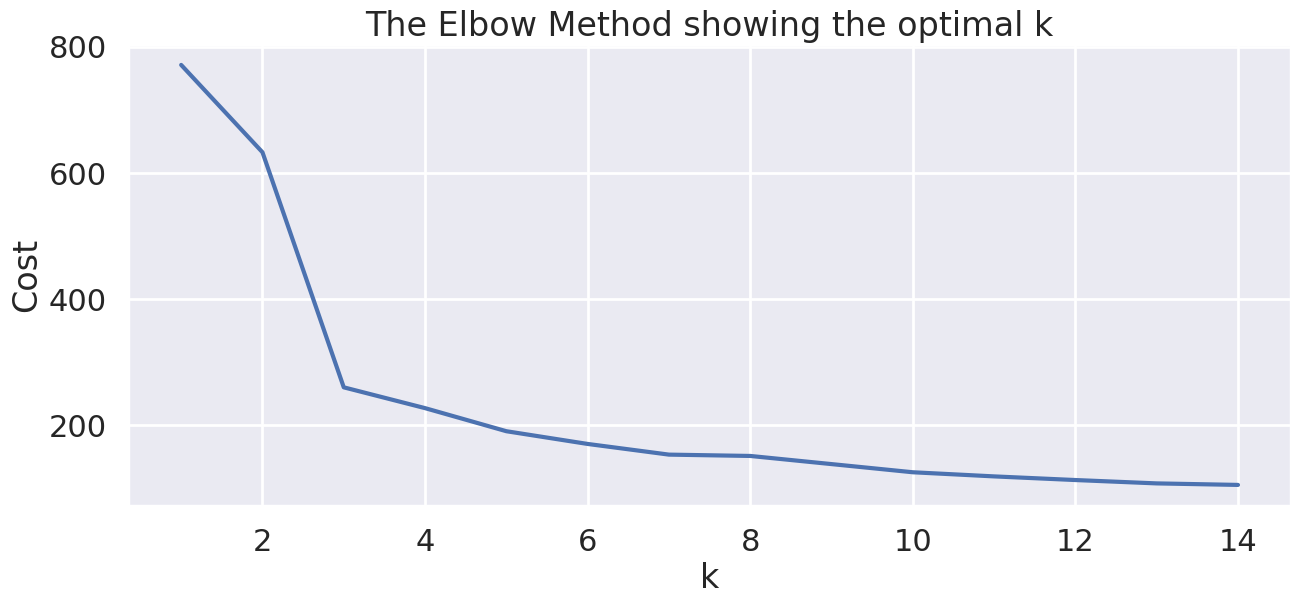

In [38]:
plt.figure(figsize=(15,6))
sns.set_context('poster')
plt.plot(pd.DataFrame(cost)[0], pd.DataFrame(cost)[1])
plt.xlabel('k')
plt.ylabel('Cost')
plt.title('The Elbow Method showing the optimal k')
plt.show()

From the above graph we can see that the elbow is formed when the input was 3 clusters.
<br>But before proceding, let us check the **Silhouette Score**

### Silhouette Score

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

In [39]:
from sklearn.metrics import silhouette_score

In [40]:
#add plot
s_score = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled)
    s_score.append([k, silhouette_score(scaled, kmeans.labels_)])

In [41]:
s_score

[[2, 0.326211515998796],
 [3, 0.5054468741347986],
 [4, 0.4830875623478687],
 [5, 0.40489337852185026],
 [6, 0.42096134135703855],
 [7, 0.42124693567055793],
 [8, 0.4230928192793077],
 [9, 0.3830480802113479],
 [10, 0.3733378931413238],
 [11, 0.3476312481286541],
 [12, 0.34880926472317414],
 [13, 0.3598256692491226],
 [14, 0.34922600413754873]]

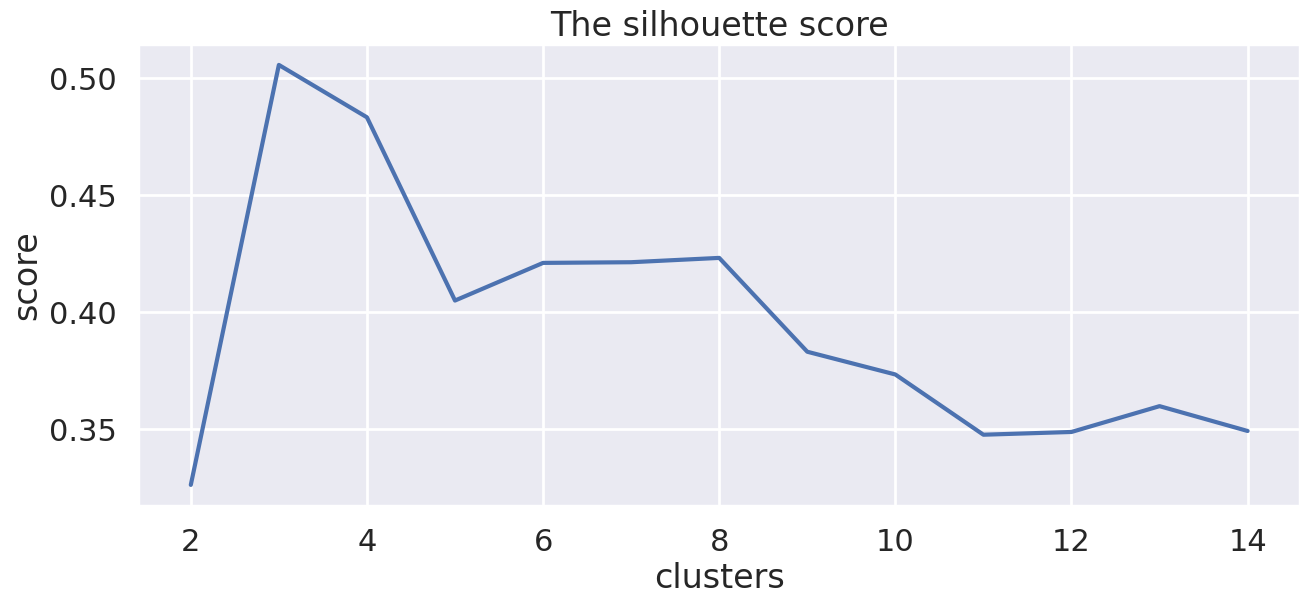

In [42]:
plt.figure(figsize=(15,6))
sns.set_context('poster')
plt.plot( pd.DataFrame(s_score)[0], pd.DataFrame(s_score)[1])
plt.xlabel('clusters')
plt.ylabel('score')
plt.title('The silhouette score')
plt.show()

## Final clusters using K-Means

After checking the **Elbow Score** and **Silhoute Score**, we can conclude that number of clusters/k should be 3.

**Task 9:** Apply kmeans algorithm with number of clusters = 3. Also assign values to the predicted data and check value count.

In [44]:
# Write code here to apply KMeans with number of clusters = 3
from sklearn.cluster import KMeans

# Initialize KMeans with 3 clusters
kmean3 = KMeans(n_clusters=3, random_state=0)

# Write code to fit the model
kmean3.fit(new)

# Write code to assign labels to predicted data
pred['kmean3'] = kmean3.labels_

# Write code to display value counts
print(pred['kmean3'].value_counts())



kmean3
1    6467
0    1719
2     764
Name: count, dtype: int64


## Profiling

**Profiling and its usage**<br>
Having decided (for now) how many clusters to use, we would like to get a better understanding of what values are in those clusters are and interpret them.

Data analytics is used to eventually make decisions, and that is feasible only when we are comfortable (enough) with our understanding of the analytics results, including our ability to clearly interpret them.

To this purpose, one needs to spend time visualizing and understanding the data within each of the selected clusters. For example, one can see how the summary statistics (e.g. averages, standard deviations, etc) of the profiling attributes differ across the segments.

In our case, assuming we decided we use the 3 clusters found using kmean algorithm as outlined above, we can see how the responses changes across clusters. The average values of our data within each cluster are:

In [48]:
# Subset the required columns and group by 'kmean3', then calculate the median
p_ = pred[["BALANCE", "PURCHASES", "INSTALLMENTS_PURCHASES", "CASH_ADVANCE",
           "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS", "TENURE", 'kmean3']]

# Group by 'kmean3' and calculate the median for the selected columns
pivoted = p_.groupby('kmean3')[["BALANCE", "PURCHASES", "INSTALLMENTS_PURCHASES",
                                "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS",
                                "MINIMUM_PAYMENTS", "TENURE"]].median().reset_index()

# Display the pivoted data
pivoted


,kmean3,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
0,0,4263.008734,749.30,121.00,1405.776254,9000.0,2055.673322,1232.547913,12.0
1,1,559.730777,346.02,95.76,0.000000,2700.0,700.220510,259.351800,12.0
2,2,486.084834,179.50,0.00,451.892161,1500.0,324.621485,195.124764,7.0


# Radar Plot

The radar chart is a chart and/or plot that consists of a sequence of equi-angular spokes, called radii, with each spoke representing one of the variables. The data length of a spoke is proportional to the magnitude of the variable for the data point relative to the maximum magnitude of the variable across all data points. A line is drawn connecting the data values for each spoke. This gives the plot a star-like appearance and the origin of one of the popular names for this plot.

<img src="https://upload.wikimedia.org/wikipedia/commons/0/00/Spider_Chart.svg" />

In [49]:
#!pip install plotly

[Sign UP](https://plot.ly/Auth/login/?action=signup#/) on Plotly, verify your email address and regenerate your API key

In [50]:
import plotly
#plotly.tools.set_credentials_file(username='Your username', api_key='Your password')

In [53]:
!pip install chart-studio
import chart_studio.plotly as py
import plotly.graph_objs as go



In [54]:
radar_data = [
    go.Scatterpolar(
      r = list(pivoted.loc[0,["BALANCE", "PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","TENURE", 'BALANCE']]),
      theta = ["BALANCE", "PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","TENURE", 'BALANCE'],
      fill = None,
      fillcolor=None,
      name = 'Cluster 0'
    ),
    go.Scatterpolar(
      r = list(pivoted.loc[1,["BALANCE", "PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","TENURE", 'BALANCE']]),
      theta = ["BALANCE", "PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","TENURE", 'BALANCE'],
      fill = None,
      fillcolor=None,
      name = 'Cluster 1'
    ),
    go.Scatterpolar(
      r = list(pivoted.loc[2,["BALANCE", "PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","TENURE", 'BALANCE']]),
      theta = ["BALANCE", "PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","TENURE", 'BALANCE'],
      fill = None,
      fillcolor=None,
      name = 'Cluster 2'
    )
]

In [55]:
radar_layout = go.Layout(polar = dict(radialaxis = dict(visible = True,range = [0, 9000])), showlegend = True)

In [ ]:
fig = go.Figure(data=radar_data, layout=radar_layout)
py.iplot(fig, filename = "radar")